# <i><b><center> Import Libraries

In [283]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# <i><b><center> Import Dataset

In [197]:
data = pd.read_csv("./Breast_Cancer.csv")
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


# <i><b><center> Data Cleaning

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [199]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [200]:
data.shape

(4024, 16)

In [201]:
data = data[~data.duplicated()]

In [202]:
data.shape

(4023, 16)

In [203]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [204]:
data.loc[data['Grade'] == ' anaplastic; Grade IV', 'Grade'] = '4'
data['Grade'] = data['Grade'].astype(int)

In [205]:
data['Grade'].unique()

array([3, 2, 1, 4])

# <i><b><center> EDA

<Axes: ylabel='Age'>

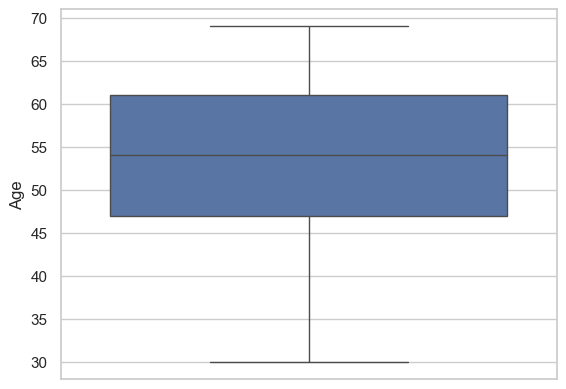

In [206]:
sns.boxplot(data=data['Age'])

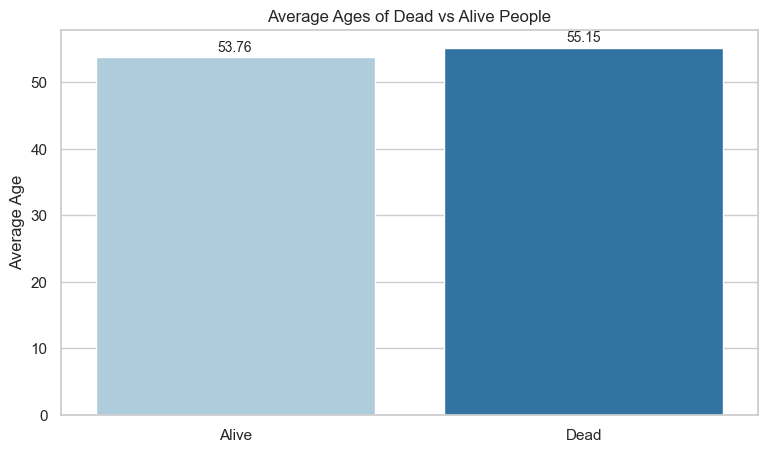

In [207]:
plt.figure(figsize=(9, 5))
alive_avg_Age = data.groupby('Status')[['Age']].mean()
sns.barplot(data=alive_avg_Age, x=alive_avg_Age.index, y=alive_avg_Age['Age'], palette='Paired')

for index, value in enumerate(alive_avg_Age['Age']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel(None)
plt.ylabel("Average Age")
plt.title("Average Ages of Dead vs Alive People")

plt.show()

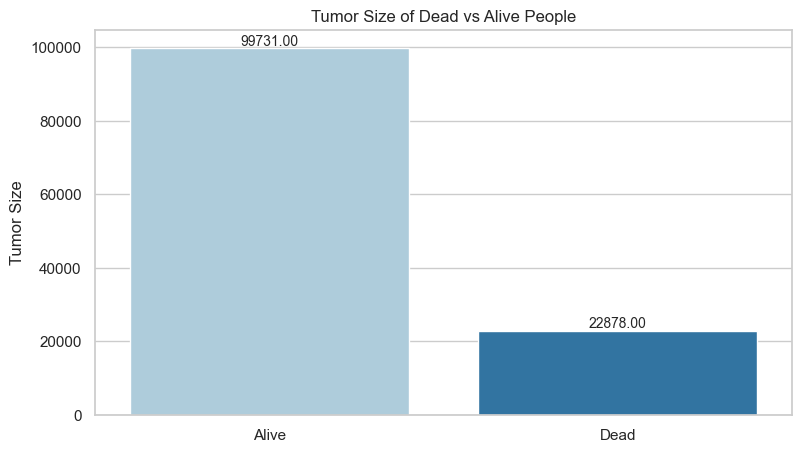

In [208]:
plt.figure(figsize=(9, 5))
alive_avg_tumor = data.groupby('Status')[['Tumor Size']].sum()
sns.barplot(data=alive_avg_tumor, x=alive_avg_tumor.index, y=alive_avg_tumor['Tumor Size'], palette='Paired')

for index, value in enumerate(alive_avg_tumor['Tumor Size']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel(None)
plt.ylabel("Tumor Size")
plt.title("Tumor Size of Dead vs Alive People")

plt.show()

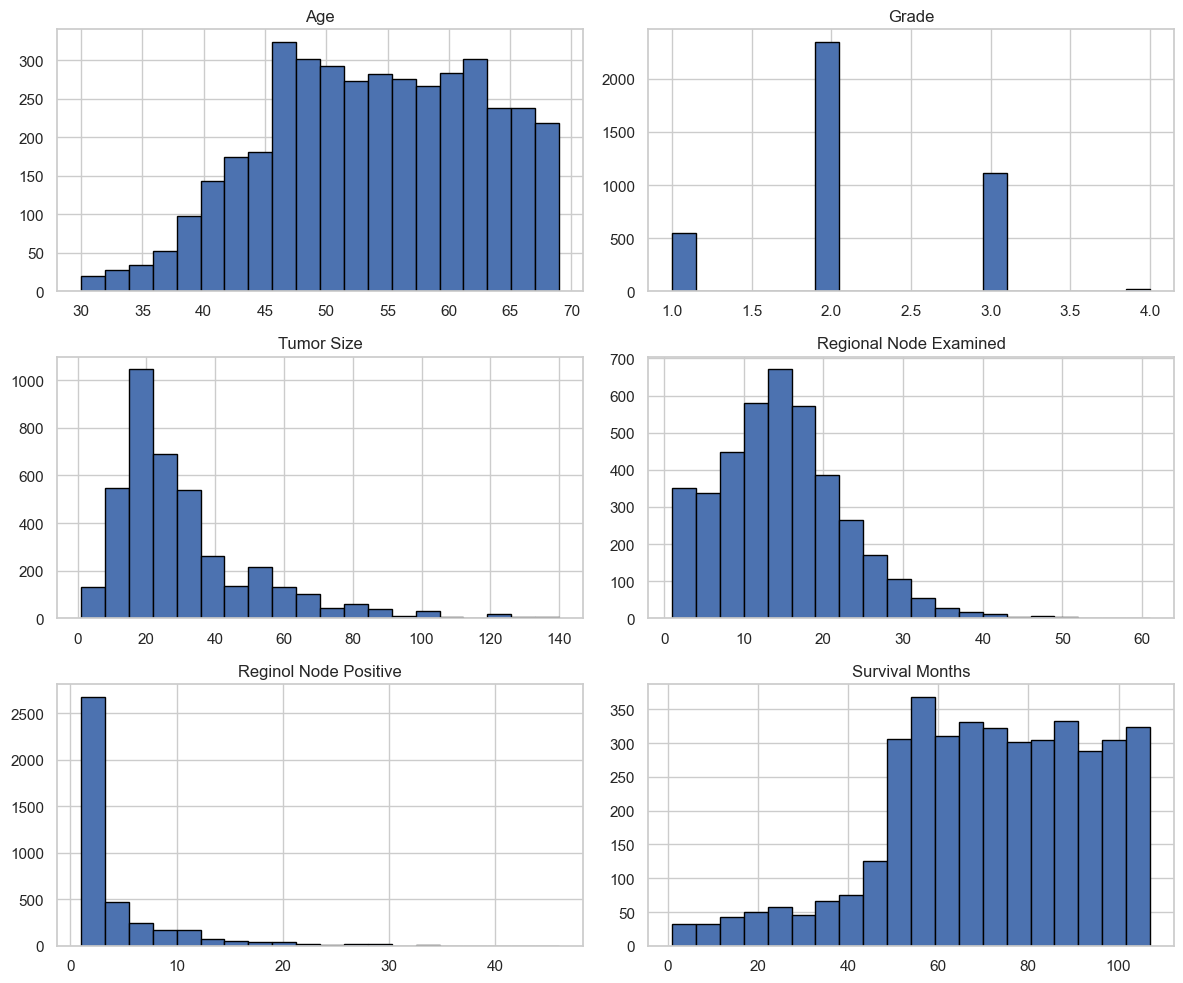

In [209]:
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [210]:
def plot_categorical_features(data, hue_column='Status'):
    for feature in data.select_dtypes(include='object'):
        plt.figure(figsize=(10, 6))
        
        ax = sns.countplot(x=feature, hue=hue_column, data=data, palette='Set1')
        
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                        textcoords='offset points')

        plt.title(f'Distribution of {feature} by {hue_column}', fontsize=16, weight='bold')
        plt.xlabel(f'{feature}', fontsize=12)
        plt.ylabel(None)
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plt.tight_layout()
        
        plt.show()

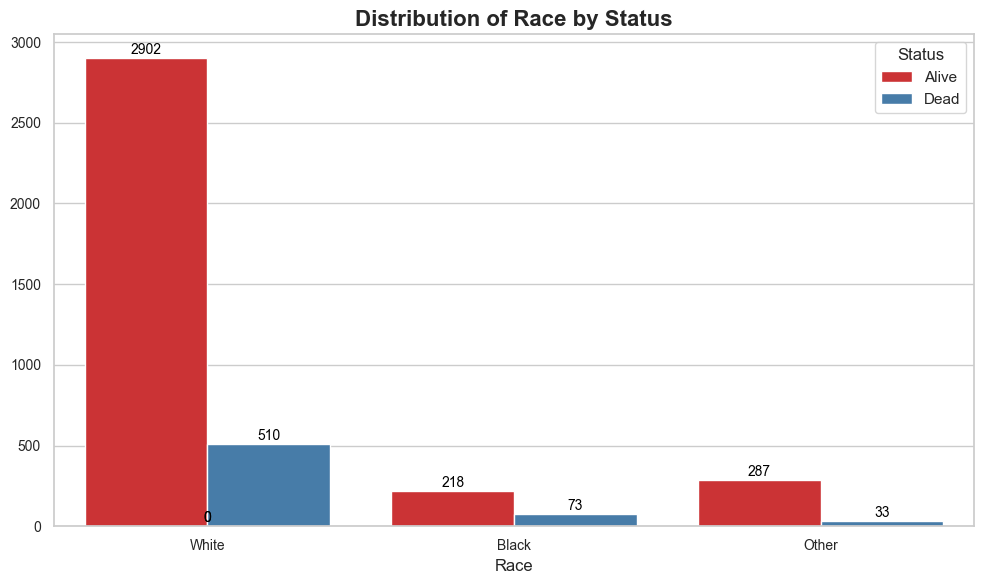

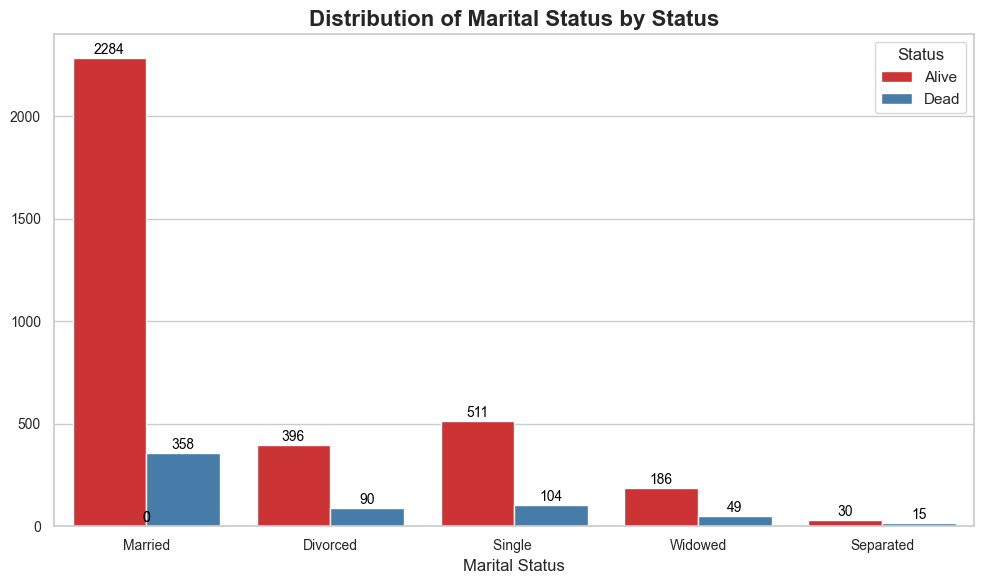

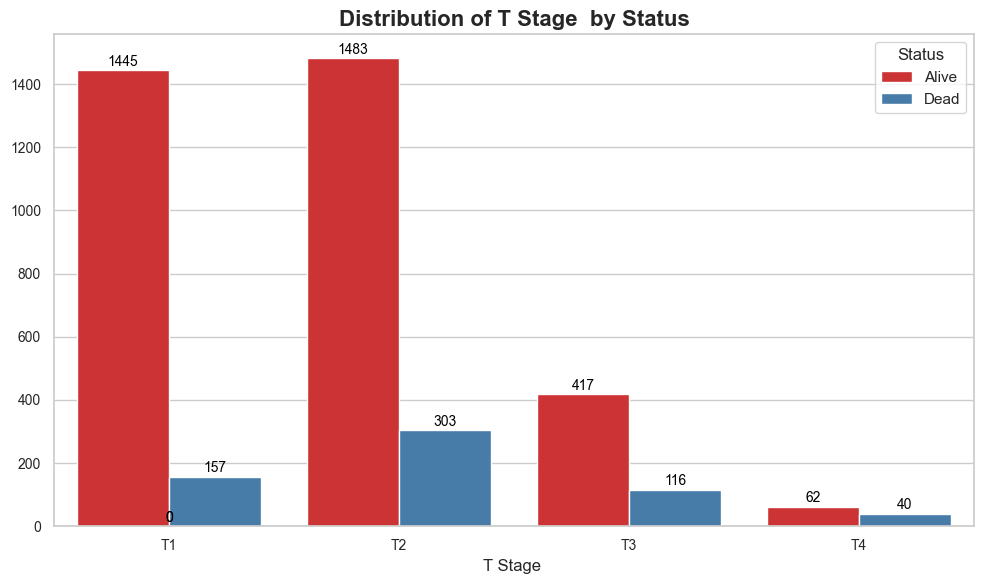

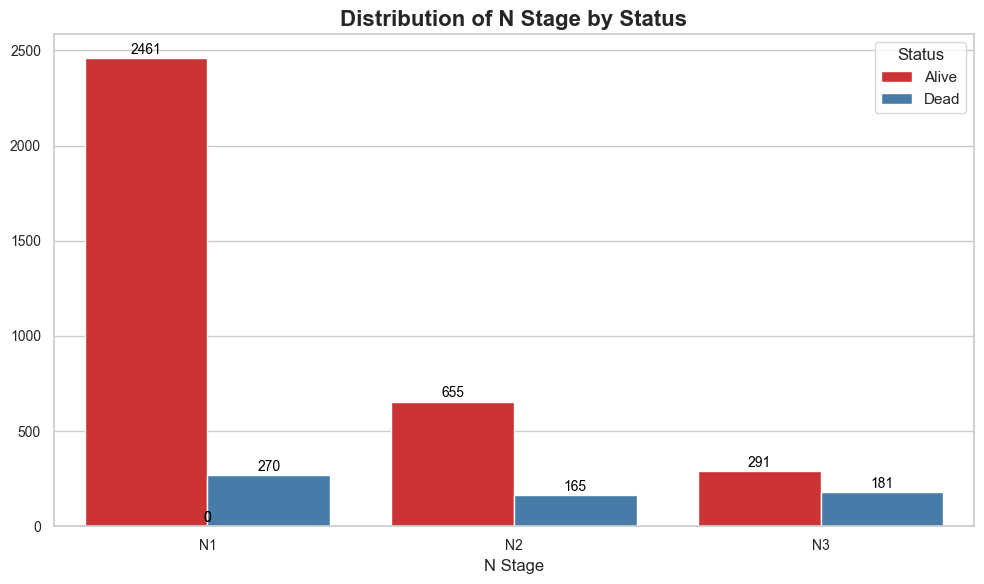

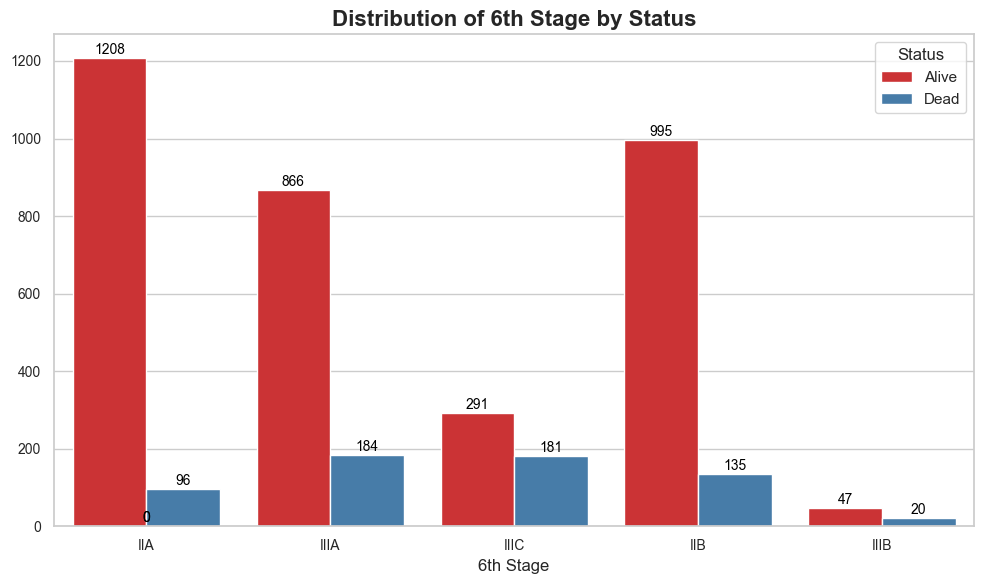

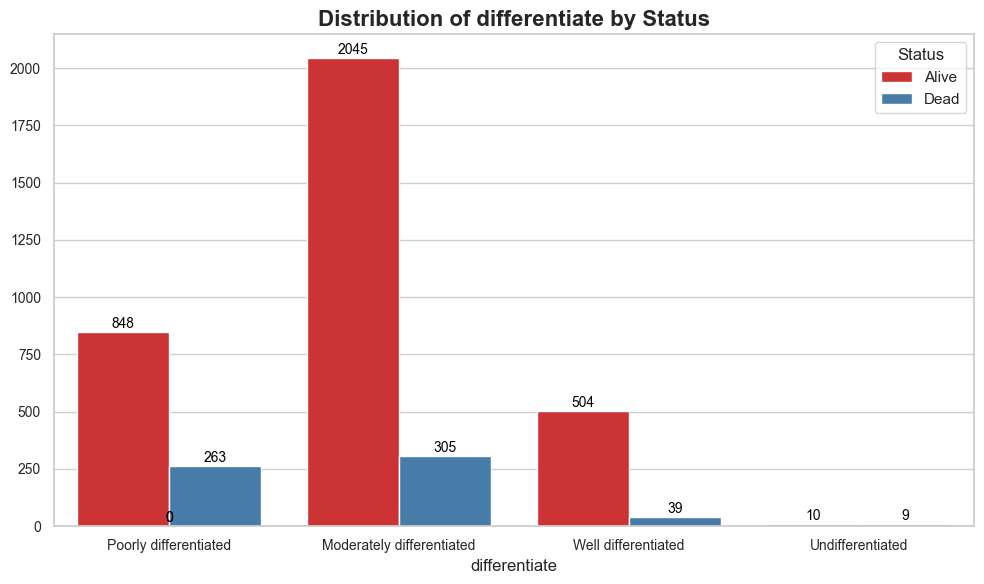

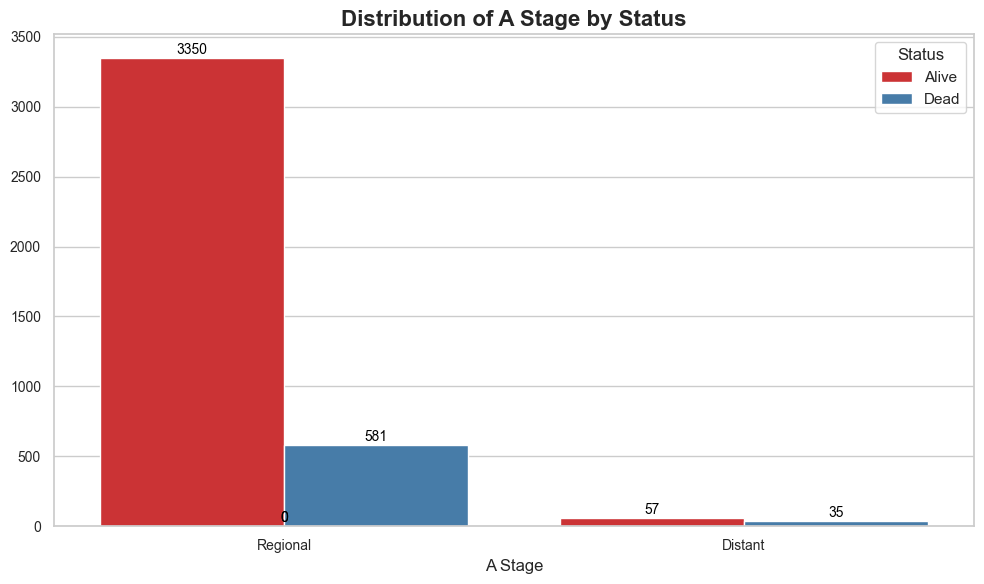

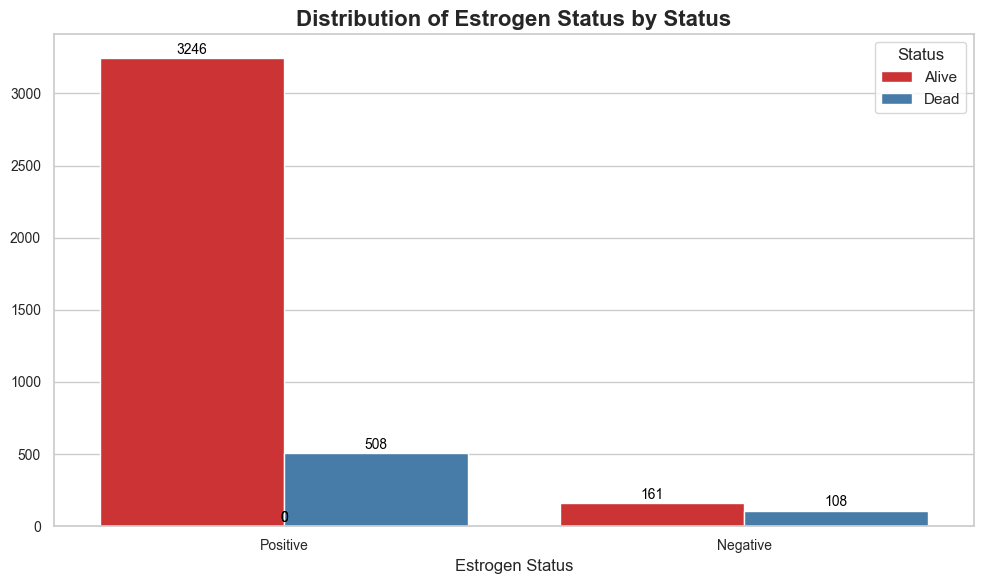

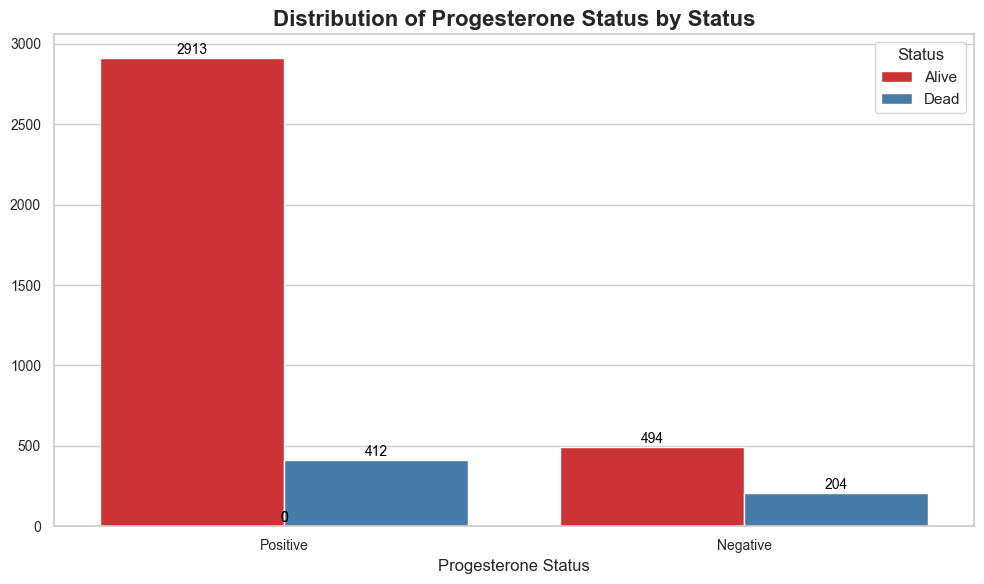

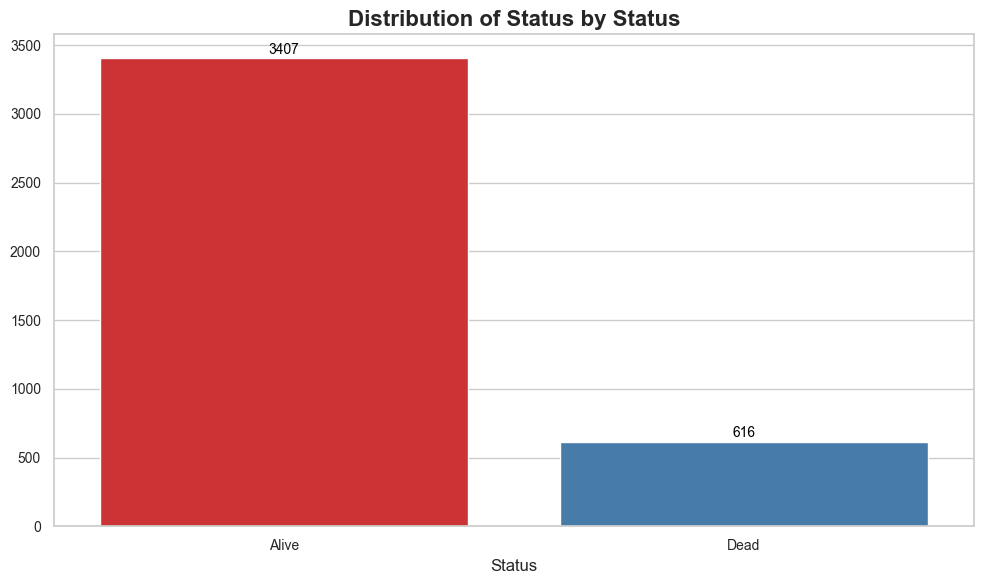

In [211]:
plot_categorical_features(data=data)

In [213]:
obj_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns
num_cols

Index(['Age', 'Grade', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')

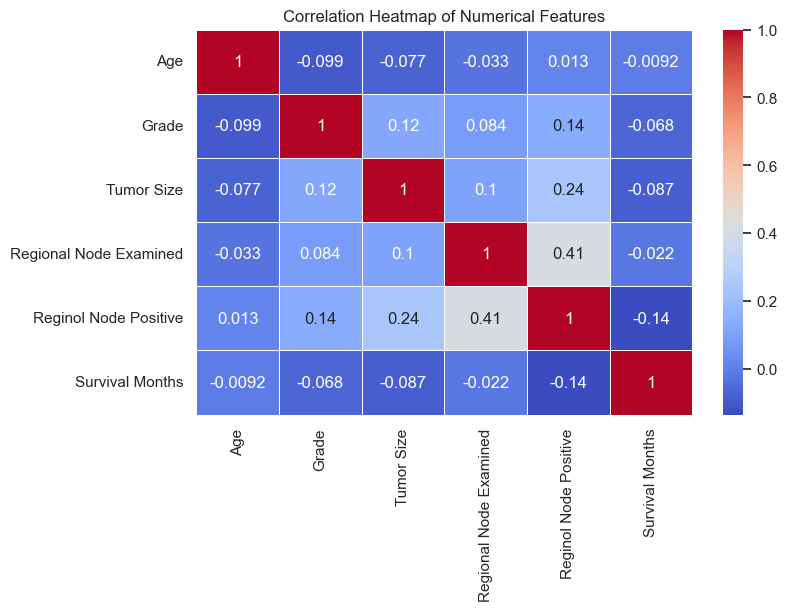

In [214]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# <i><b><center> Model Building

In [216]:
label_encoder = LabelEncoder()
for col in obj_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [217]:
data[obj_cols].head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,1,1,1,0
1,2,1,1,1,2,0,1,1,1,0
2,2,0,2,2,4,0,1,1,1,0
3,2,1,0,0,0,1,1,1,1,0
4,2,1,1,0,1,1,1,1,1,0


In [218]:
data.head(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0


In [219]:
X = data.drop(columns='Status')
y = data['Status']

In [220]:
scaler = StandardScaler()

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [222]:
num_cols

Index(['Age', 'Grade', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')

In [223]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
3826,0.997628,2,0,0,0,0,3,-1.803625,1,-0.591420,1,1,-0.542915,-0.222104,-0.832764
3811,-0.114205,1,1,1,0,1,1,1.322797,1,-0.257788,0,0,-0.918310,-0.620966,1.462778
3548,0.775261,2,1,0,1,2,1,1.322797,1,-0.639082,1,1,1.083797,0.775051,-0.356331
2780,-0.781305,2,1,0,0,0,0,-0.240414,1,-0.877391,1,1,1.083797,-0.620966,0.423287
820,-0.558938,2,3,0,0,0,0,-0.240414,1,-0.734406,1,1,-1.543968,-0.620966,-1.006012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,0.219345,2,1,1,1,2,0,-0.240414,1,0.933757,1,1,0.958666,0.176758,0.120102
2577,-0.336572,2,1,1,0,1,3,-1.803625,1,0.218830,1,1,0.082744,-0.421535,-0.659515
2608,1.219994,1,1,0,1,2,0,-0.240414,1,-0.734406,1,0,-0.417783,0.376189,1.246217
1974,1.442361,2,3,1,0,1,0,-0.240414,1,0.457139,1,1,0.333007,-0.222104,0.336663


In [224]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [225]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [227]:
print(classification_report(y_test, y_pred=model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       852
           1       0.79      0.45      0.58       154

    accuracy                           0.90      1006
   macro avg       0.85      0.72      0.76      1006
weighted avg       0.89      0.90      0.89      1006



# <i><b><center> Building Multiple Models

In [233]:
def models(X_train, X_test, y_train, y_test):
    model = {
        'K Nearest Neighbours': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        # 'Logistic Regression': LogisticRegression(),
        'SVC': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
    }
    result = {}
    for name, model in model.items():
        model.fit(X_train, y_train)
        
        prediction = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction, average='weighted')
        recall = recall_score(y_test, prediction, average='weighted')
        f1 = f1_score(y_test, prediction, average='weighted')
        
        result[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

    result_df = pd.DataFrame(result).T
    
    return result_df

In [279]:
result_df = models(X_train, X_test, y_train, y_test)

In [280]:
result_df = result_df.reset_index(col_level='index')
result_df.rename(columns={'index': 'Model'}, inplace=True)


# <i><b><center> Model Evaluation

In [286]:
def plot_metric(result, title):
    df_melted = result.melt(id_vars='Model', var_name='Metric', value_name='Score')
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)

    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(rotation=15, fontsize=10)
    plt.legend(title='Metric', loc='best', fontsize=10)

    plt.tight_layout()
    plt.show()

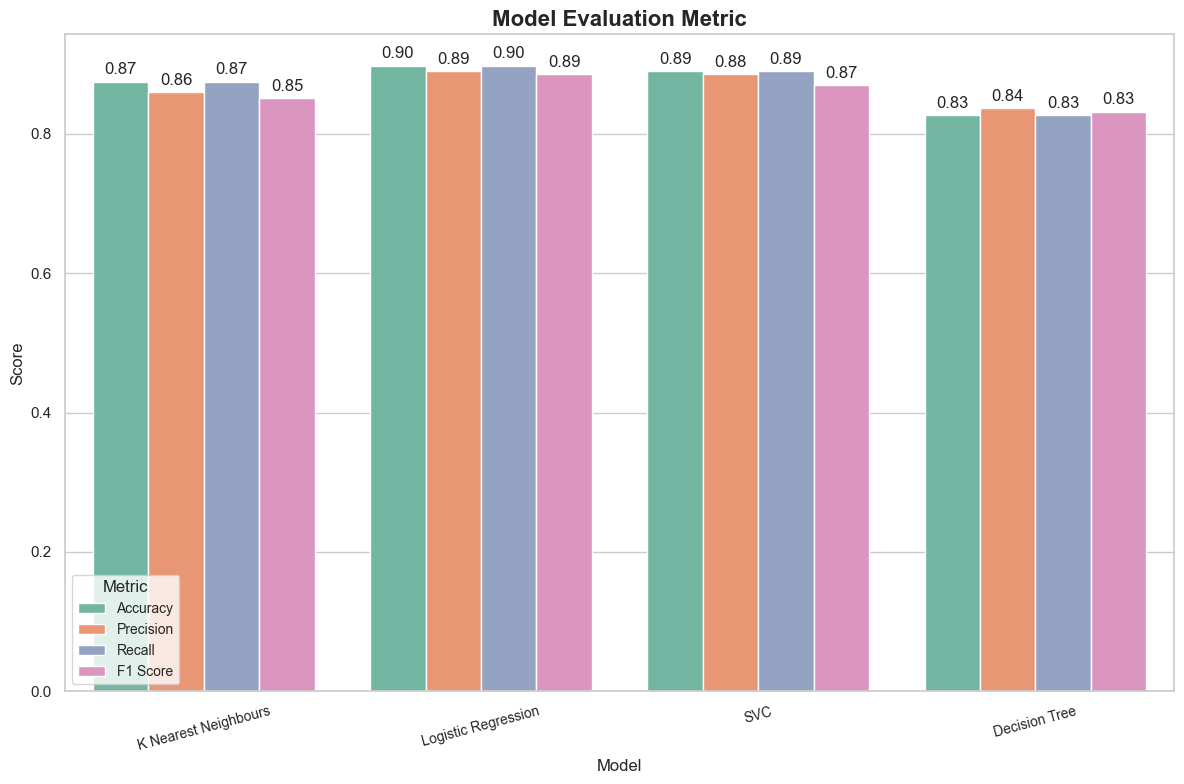

In [288]:
plot_metric(result_df, 'Model Evaluation Metric')